#Language Identification

**Steps:** \\
1- Getting Dataset. \\
2- preprocessing. \\
3- Building a classification model. \\
4- Training the model. \\
5- Testing. \\

# Getting Dataset



- The dataset that I will use is the language identification dataset provided by huggingface. \\
- The Language Identification dataset is a collection of 90k samples consisting of text passages and corresponding language label. \\
- This dataset was created by collecting data from 3 sources: Multilingual Amazon Reviews Corpus , XNLI , and STSb Multi MT. \\
- The train set contains 70k samples, while the validation and test sets 10k each. All splits are perfectly balanced: the train set contains 3500 samples per language, while the validation and test sets 500. \\
- **Languages:** arabic (ar), bulgarian (bg), german (de), modern greek (el), english (en), spanish (es), french (fr), hindi (hi), italian (it), japanese (ja), dutch (nl), polish (pl), portuguese (pt), russian (ru), swahili (sw), thai (th), turkish (tr), urdu (ur), vietnamese (vi), and chinese (zh). \\
https://huggingface.co/datasets/papluca/language-identification 

In [ ]:
import pandas as pd

In [ ]:
!wget https://www.dropbox.com/s/hg0do33tbl8bct9/train.csv
!wget https://www.dropbox.com/s/plo9u0ufbvqnedg/valid.csv
!wget https://www.dropbox.com/s/r544rbhgroggdl3/test.csv

--2022-07-25 20:15:08--  https://www.dropbox.com/s/hg0do33tbl8bct9/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hg0do33tbl8bct9/train.csv [following]
--2022-07-25 20:15:08--  https://www.dropbox.com/s/raw/hg0do33tbl8bct9/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c5440bf3a7a61ac1cfd0f1bbc.dl.dropboxusercontent.com/cd/0/inline/Bpy71OskNbm2iCLovHzo2oZp-jvYif4uX609uqbgJpZvBWnPz94pirCPq0XQQqC0Mdj7ZDJqUx4pBkESKhC7fKSs2s5ZChVUB23g0VMM_7VDA4PjAjoyOd-myOxHA42_vceYHsIvg74bcU3bQfOhv4MWaZWLNx1_5deCDojyblQKwQ/file# [following]
--2022-07-25 20:15:09--  https://uc8c5440bf3a7a61ac1cfd0f1bbc.dl.dropboxusercontent.com/cd/0/inline/Bpy71OskNbm2iCLovHzo2oZp-jvYif4uX609uqbgJpZvBWnPz94pirCPq0XQQqC0Mdj7ZDJqUx4pB

In [ ]:
train = pd.read_csv('train.csv')
print(len(train))
train.head()

70000


,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


In [ ]:
valid = pd.read_csv('valid.csv')
print(len(valid))
valid.head()

10000


,labels,text
0,nl,"""Ik ken geen druk,"" zei Mr. Feith, de ondersec..."
1,nl,Hier is mijn advies op basis van mijn persoonl...
2,es,"Por el precio, este reloj es inmejorable. Esti..."
3,it,Il Giappone tace in occasione della tragedia d...
4,ar,تشغيل صامت، تشغيل عميق، قم بتشغيل الإجابة


In [ ]:
test = pd.read_csv('test.csv')
print(len(test))
test.head()

10000


,labels,text
0,nl,Een man zingt en speelt gitaar.
1,nl,De technologisch geplaatste Nasdaq Composite I...
2,es,Es muy resistente la parte trasera rígida y lo...
3,it,"""In tanti modi diversi, l'abilità artistica de..."
4,ar,منحدر يواجه العديد من النقاشات المتجهه إزاء ال...


# Building a classification model

I will experiment with 4 options: \\
1- Manually extracting features and training a Machine Learning (ML) classsifier on it. \\
2- Using a neural network that will automatically extract features and learn them. \\
3- Finetuning a pretrained multilingual deep language model on my dataset. \\
4- knowledge distillation from a large pretrained multilingual model.

#1- ML classifier

**Preprocessing:** \\
Preprocessing will include manually extracting the features to be used by the classifiers, performing correlation analysis between feature, and then using PCA to reduce correlations among features.

**Features:** \\
1- **word_count:** Counts the words in each text observation. \\
2- **character_count:** Counts the number of non-space characters. \\
3- **word_density:** Divides the word_count by the character_count and creates an average relative relation between the latter two variables. \\
4- **punc_count:** Counts the number of punctuations in a text input. Some languages may use more punctuations. \\
5- **num_double_consec_vowels:** Counts the number of same consecutive vowels in a text. \\
6- **num_consec_vowels:** Counts the number of different consecutive vowels in a text. \\
7- **num_vowels:** Number of vowels in a text. \\
8- **vowel_density:** Standardizes the number of vowels to the number of words in a text. \\
9- **capitals:** Counts the number of capital letters used in a text. \\
10- **caps_vs_length:** Standardizes the number of capital letters used to the total number of characters in a text. \\
11- **num_exclamation_marks:** Counts the number of exclamation marks in a text. \\
12- **num_question_marks:** Counts the number of question marks in a text. \\
13 **num_punctuation:** Counts the number of punctuations in a text. \\
14- **num_unique_words:** Counts the number of unique words in a text. \\
15- **num_repeated_words:** Counts the number of repeated words in a text. \\
16- **words_vs_unique:** Standadizes the number of unique words to the number of words in a text.

In [ ]:
from itertools import permutations
import seaborn as sns
import collections

In [ ]:
df = train

punc = ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?")
vowels=['a','e','i','o','u']
same_consecutive_vowels = ['aa','ee', 'ii', 'oo', 'uu']
consecutive_vowels = [''.join(p) for p in permutations(vowels,2)]

df['word_count'] = df['text'].apply(lambda x : len(x.split()))
df['character_count'] = df['text'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['character_count'] + 1)
df['punc_count'] = df['text'].apply(lambda x : len([a for a in x if a in punc]))
df['num_double_consec_vowels'] = df['text'].apply(lambda x : sum([any(c_v in a for c_v in same_consecutive_vowels) for a in x.split()]))
df['num_consec_vowels'] = df['text'].apply(lambda x : sum([any(c_v in a for c_v in consecutive_vowels) for a in x.split()]))
df['num_vowels'] = df['text'].apply(lambda x : sum([any(v in a for v in vowels) for a in x.split()]))
df['vowel_density'] = df['num_vowels']/df['word_count']
df['capitals'] = df['text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['character_count']),axis=1)
df['num_exclamation_marks'] =df['text'].apply(lambda x: x.count('!'))
df['num_question_marks'] = df['text'].apply(lambda x: x.count('?'))
df['num_punctuation'] = df['text'].apply(lambda x: sum(x.count(w) for w in punc))
df['num_unique_words'] = df['text'].apply(lambda x: len(set(w for w in x.split())))
df['num_repeated_words'] = df['text'].apply(lambda x: len([w for w in collections.Counter(x.split()).values() if w > 1]))
df['words_vs_unique'] = df['num_unique_words'] / df['word_count']



In [ ]:
df_test = test

df_test['word_count'] = df_test['text'].apply(lambda x : len(x.split()))
df_test['character_count'] = df_test['text'].apply(lambda x : len(x.replace(" ","")))
df_test['word_density'] = df_test['word_count'] / (df['character_count'] + 1)
df_test['punc_count'] = df_test['text'].apply(lambda x : len([a for a in x if a in punc]))
df_test['num_double_consec_vowels'] = df_test['text'].apply(lambda x : sum([any(c_v in a for c_v in same_consecutive_vowels) for a in x.split()]))
df_test['num_consec_vowels'] = df_test['text'].apply(lambda x : sum([any(c_v in a for c_v in consecutive_vowels) for a in x.split()]))
df_test['num_vowels'] = df_test['text'].apply(lambda x : sum([any(v in a for v in vowels) for a in x.split()]))
df_test['vowel_density'] = df_test['num_vowels']/df_test['word_count']
df_test['capitals'] = df_test['text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df_test['caps_vs_length'] = df_test.apply(lambda row: float(row['capitals'])/float(row['character_count']),axis=1)
df_test['num_exclamation_marks'] =df_test['text'].apply(lambda x: x.count('!'))
df_test['num_question_marks'] = df_test['text'].apply(lambda x: x.count('?'))
df_test['num_punctuation'] = df_test['text'].apply(lambda x: sum(x.count(w) for w in punc))
df_test['num_unique_words'] = df_test['text'].apply(lambda x: len(set(w for w in x.split())))
df_test['num_repeated_words'] = df_test['text'].apply(lambda x: len([w for w in collections.Counter(x.split()).values() if w > 1]))
df_test['words_vs_unique'] = df_test['num_unique_words'] / df_test['word_count']

In [ ]:
df.head()

,labels,text,word_count,character_count,word_density,punc_count,num_double_consec_vowels,num_consec_vowels,num_vowels,vowel_density,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_unique_words,num_repeated_words,words_vs_unique
0,pt,"os chefes de defesa da estónia, letónia, lituâ...",24,138,0.172662,6,0,7,24,1.000000,0,0.000000,0,0,6,21,3,0.875000
1,bg,размерът на хоризонталната мрежа може да бъде ...,26,106,0.242991,1,0,0,0,0.000000,0,0.000000,0,0,1,20,4,0.769231
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...,1,112,0.008850,0,0,0,0,0.000000,0,0.000000,0,0,0,1,0,1.000000
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...,22,108,0.201835,0,0,0,1,0.045455,0,0.000000,0,0,0,17,3,0.772727
4,ru,Он увеличил давление .,4,19,0.200000,1,0,0,0,0.000000,1,0.052632,0,0,1,4,0,1.000000


In [ ]:
df_test.head()

,labels,text,word_count,character_count,word_density,punc_count,num_double_consec_vowels,num_consec_vowels,num_vowels,vowel_density,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_unique_words,num_repeated_words,words_vs_unique
0,nl,Een man zingt en speelt gitaar.,6,26,0.043165,1,2,0,6,1.000000,1,0.038462,0,0,1,6,0,1.000000
1,nl,De technologisch geplaatste Nasdaq Composite I...,16,97,0.149533,8,2,0,12,0.750000,8,0.082474,0,0,8,16,0,1.000000
2,es,Es muy resistente la parte trasera rígida y lo...,19,90,0.168142,1,0,1,17,0.894737,2,0.022222,0,0,1,19,0,1.000000
3,it,"""In tanti modi diversi, l'abilità artistica de...",23,132,0.211009,7,0,4,22,0.956522,2,0.015152,0,0,7,20,3,0.869565
4,ar,منحدر يواجه العديد من النقاشات المتجهه إزاء ال...,12,62,0.600000,1,0,0,0,0.000000,0,0.000000,0,0,1,12,0,1.000000


In [ ]:
df.groupby('labels').mean().T

labels,ar,bg,de,el,en,es,fr,hi,it,ja,nl,pl,pt,ru,sw,th,tr,ur,vi,zh
word_count,19.672286,21.531143,32.763714,22.236857,34.357143,27.694857,28.199429,31.474571,11.480000,2.634857,10.574857,9.094571,11.423714,20.966000,20.394857,21.111143,17.754857,21.054571,29.148571,1.417143
character_count,78.535429,93.587143,174.063143,104.684857,146.712286,124.397429,132.375429,85.451143,59.492286,98.534571,57.252571,55.489429,56.447143,97.349143,87.817143,92.501429,85.466000,64.638571,93.120286,50.335714
word_density,0.258044,0.239717,0.186469,0.219928,0.230360,0.220252,0.210656,0.365205,0.193207,0.031866,0.188210,0.164470,0.204190,0.225474,0.234982,0.232209,0.210615,0.324298,0.315251,0.035734
punc_count,1.990286,3.269429,4.889429,2.269143,4.453143,3.286571,4.720000,1.828000,1.488000,0.111143,1.574857,1.468571,1.304286,3.678286,2.290286,0.517429,2.660571,0.283143,2.040286,0.196571
num_double_consec_vowels,0.004286,0.006000,0.148571,0.010857,1.105714,0.036286,0.022000,0.011143,0.032571,0.014000,1.940857,0.091714,0.032571,0.003143,0.591714,0.023143,0.080286,0.008000,0.035714,0.002857
num_consec_vowels,0.040857,0.047714,7.786571,0.079714,3.862571,4.404000,8.191714,0.117714,2.091429,0.018000,1.687143,1.970857,2.042286,0.041714,2.378857,0.146857,0.221429,0.031714,0.924286,0.004286
num_vowels,0.192857,0.182571,30.867714,0.356286,31.658000,25.573143,25.662286,0.398000,10.681143,0.116571,10.153429,7.795714,10.464286,0.173429,17.558000,0.632286,13.943714,0.215143,10.839143,0.055429
vowel_density,0.008741,0.007866,0.941016,0.013478,0.924194,0.919989,0.906429,0.013751,0.927153,0.043033,0.962763,0.873420,0.913609,0.008189,0.855075,0.028268,0.787463,0.009299,0.370126,0.035514
capitals,0.004286,0.000286,9.114286,1.615429,4.742000,3.355714,3.420571,0.043143,2.196286,0.683714,2.232857,2.221429,2.334571,1.602571,0.971714,0.040286,1.930000,0.000000,1.394000,0.135714
caps_vs_length,0.000065,0.000002,0.055294,0.023680,0.036113,0.033247,0.030476,0.000704,0.040048,0.005640,0.043121,0.043841,0.044879,0.025412,0.019502,0.000614,0.030849,0.000000,0.022000,0.001912


Looking at the table, we can see that there are some features that show significant differences between languages, for example. word count, character count, and number of unique words. \\
However, some features are irrelevant for some languages, for example, number of capital letters and number of vowels are irrelevant for languages that do not use latin characters such as Arabic and Urdu.

**Correlation Analysis**

 The idea is that, if two or more features are highly correlated, then they will hold very similar explanatory power when classifying text into languages. As such, we can keep only one of these features and still obtain (more or less) the same predictive power from our model.

In [ ]:
df.corr(method ='pearson')

,word_count,character_count,word_density,punc_count,num_double_consec_vowels,num_consec_vowels,num_vowels,vowel_density,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_unique_words,num_repeated_words,words_vs_unique
word_count,1.000000,0.890115,0.311805,0.683697,0.180205,0.595249,0.710647,0.051886,0.351081,-0.068720,0.107311,0.065526,0.683697,0.979941,0.898658,-0.661110
character_count,0.890115,1.000000,-0.025147,0.677773,0.186354,0.663558,0.743682,0.085126,0.420781,-0.052773,0.119969,0.043017,0.677773,0.884277,0.776544,-0.490187
word_density,0.311805,-0.025147,1.000000,0.118330,-0.019149,-0.037505,0.012731,-0.104249,-0.046876,-0.031906,-0.002962,0.072756,0.118330,0.313096,0.278250,-0.422052
punc_count,0.683697,0.677773,0.118330,1.000000,0.164575,0.602460,0.649672,0.182426,0.389931,0.053866,0.263055,0.169846,1.000000,0.689392,0.543672,-0.387945
num_double_consec_vowels,0.180205,0.186354,-0.019149,0.164575,1.000000,0.170698,0.326843,0.283691,0.131151,0.051574,0.021588,-0.000876,0.164575,0.172403,0.153310,-0.073716
num_consec_vowels,0.595249,0.663558,-0.037505,0.602460,0.170698,1.000000,0.853923,0.453299,0.441367,0.086106,0.188472,0.033497,0.602460,0.618582,0.472105,-0.184646
num_vowels,0.710647,0.743682,0.012731,0.649672,0.326843,0.853923,1.000000,0.535058,0.462033,0.081972,0.163558,0.034510,0.649672,0.722259,0.585249,-0.276577
vowel_density,0.051886,0.085126,-0.104249,0.182426,0.283691,0.453299,0.535058,1.000000,0.224823,0.267602,0.093640,-0.016650,0.182426,0.087150,-0.033975,0.135641
capitals,0.351081,0.420781,-0.046876,0.389931,0.131151,0.441367,0.462033,0.224823,1.000000,0.652985,0.136012,0.048924,0.389931,0.369208,0.266850,-0.081103
caps_vs_length,-0.068720,-0.052773,-0.031906,0.053866,0.051574,0.086106,0.081972,0.267602,0.652985,1.000000,0.060831,0.022195,0.053866,-0.058281,-0.090862,0.139042


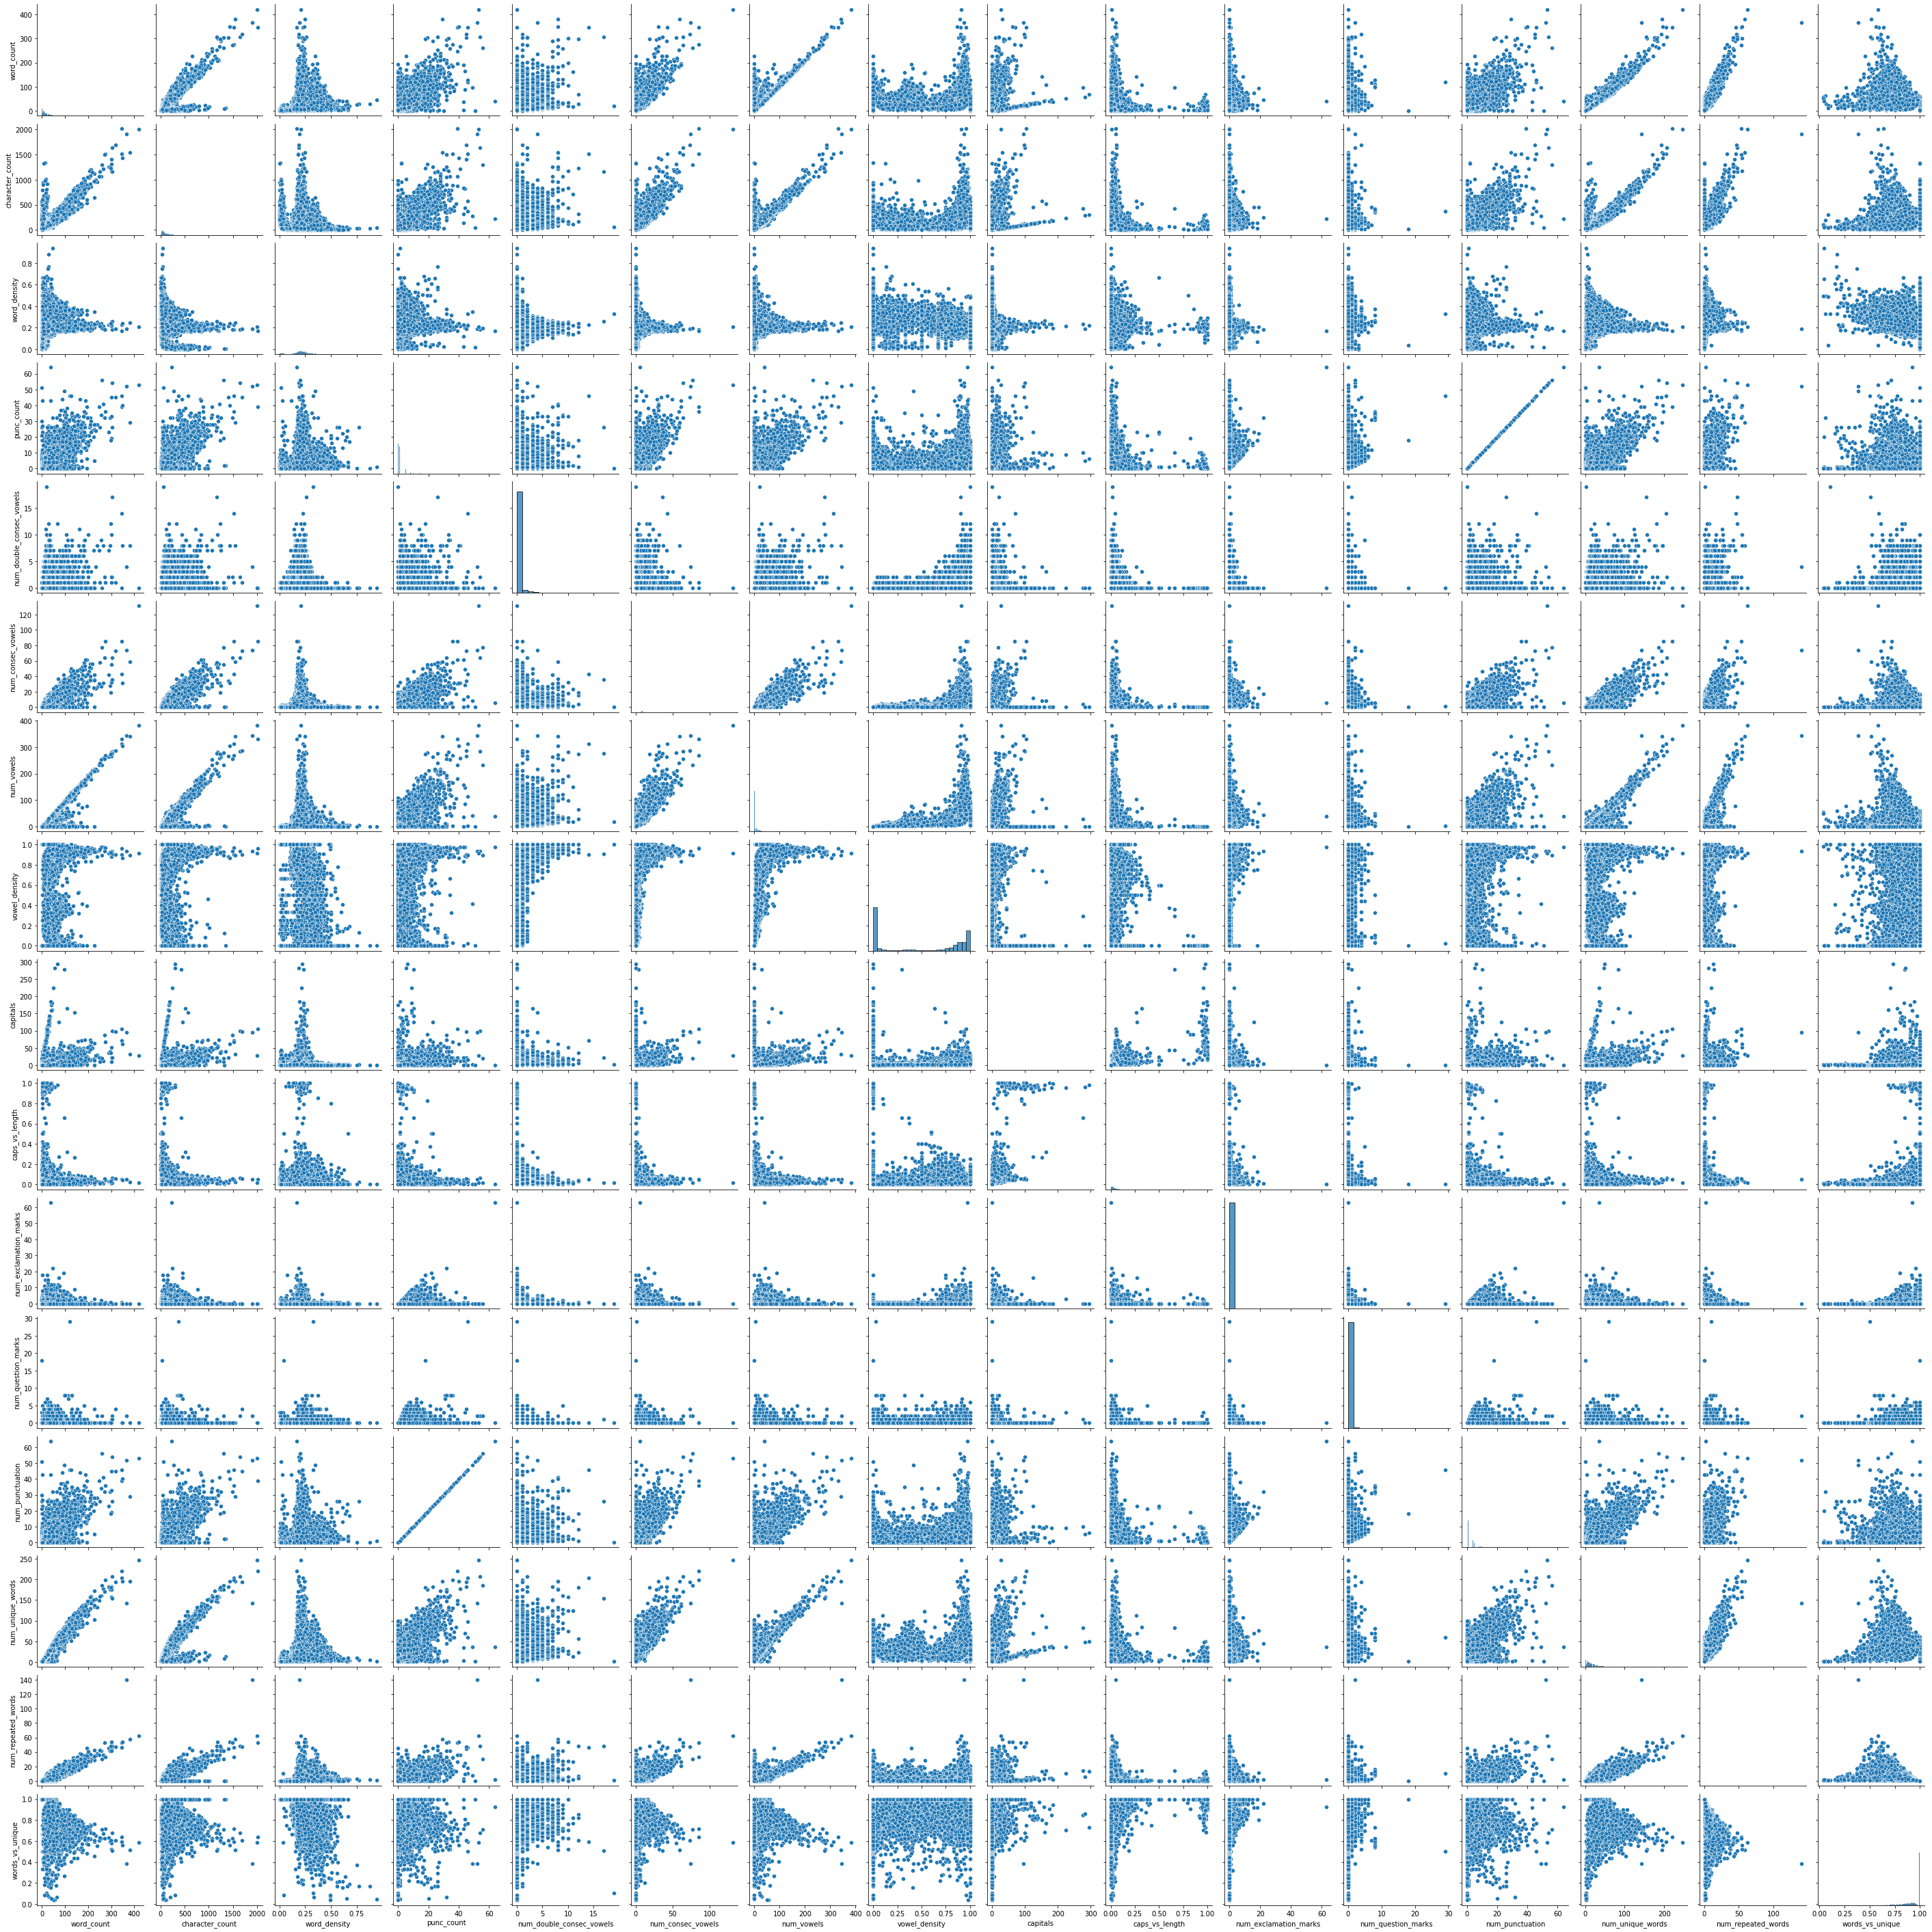

In [ ]:
sns.pairplot(df)

Notice how some features are highly positively correlated. For instance, word_count and character_count have a correlation of 89%, which means they tell us pretty much the same thing in terms of the length of a text for each language considered.

In [ ]:
# Getting training data
feature_cols = list(df.columns)[2:]
X = df[feature_cols] # Features
y = df[['labels']]   # Labels

In [ ]:
# Getting test data
X_test = df_test[feature_cols] # Features
y_test = df_test[['labels']]   # Labels

**Principal Component Analysis (PCA)**

- PCA converts a set of correlated variables into a set of linearly uncorrelated variables called principal components, which can then be used in models without potentially violating assumptions of multicollinearity. \\
- In order to use PCA, I first scale the data since PCA is affected by scale. \\
- I fit the scaler on the training features set and transform both the training and testing features sets. \\
- Next, I fit PCA on the scaled training features and then transform the scaled training and testing features sets. \\
- I require that the principal components generated by PCA retain 95% of the variance in the original set of features. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X)
# Transform both the training set and the test set.
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Make an instance of the model to retain 95% of the variance within the old features.
pca = PCA(.95)
pca.fit(X)

print('Number of Principal Components = '+str(pca.n_components_))
# Number of Principal Components = 9

X = pca.transform(X)
X_test = pca.transform(X_test)

Number of Principal Components = 9


Notice that the PCA has reduced the number of features from 16 to 9 by transforming the original features into a new set of components that retain 95% of the variance in the information contained in the original set.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

**Decision Tree Classifier**

A decision tree model learns by splitting the training set into subsets based on an attribute value test, and this process is repeated on recursive partitions until the subset at a node has the same value of the target parameter, or when additional splitting does not improve on the model’s predictive ability.

In [ ]:
dt_clf = DecisionTreeClassifier() # Create Decision Tree classifer object
dt_clf = dt_clf.fit(X,y) # Fit Decision Tree Classifer on training set

# Save model to file in the current working directory so that it can be imported and used.
pkl_file = "decision_tree_model.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(dt_clf, file)

# Load trained model from pickle file
with open(pkl_file, 'rb') as file:
    dt_clf = pickle.load(file)

dt_clf # parameters of the Decision Tree model are shown below and can be further optimized to improve model performance
y_pred = dt_clf.predict(X_test) 

In [ ]:
accuracy_score_dt = accuracy_score(y_test, y_pred)
accuracy_score_dt

0.2108

In [ ]:
labels = list(set(y['labels']))
# Confusion Matrix
cm_Model_dt = confusion_matrix(y_test, y_pred, labels=labels)

Text(0.5, 1.0, 'Decision Tree Model Accuracy Score = 21.08%')

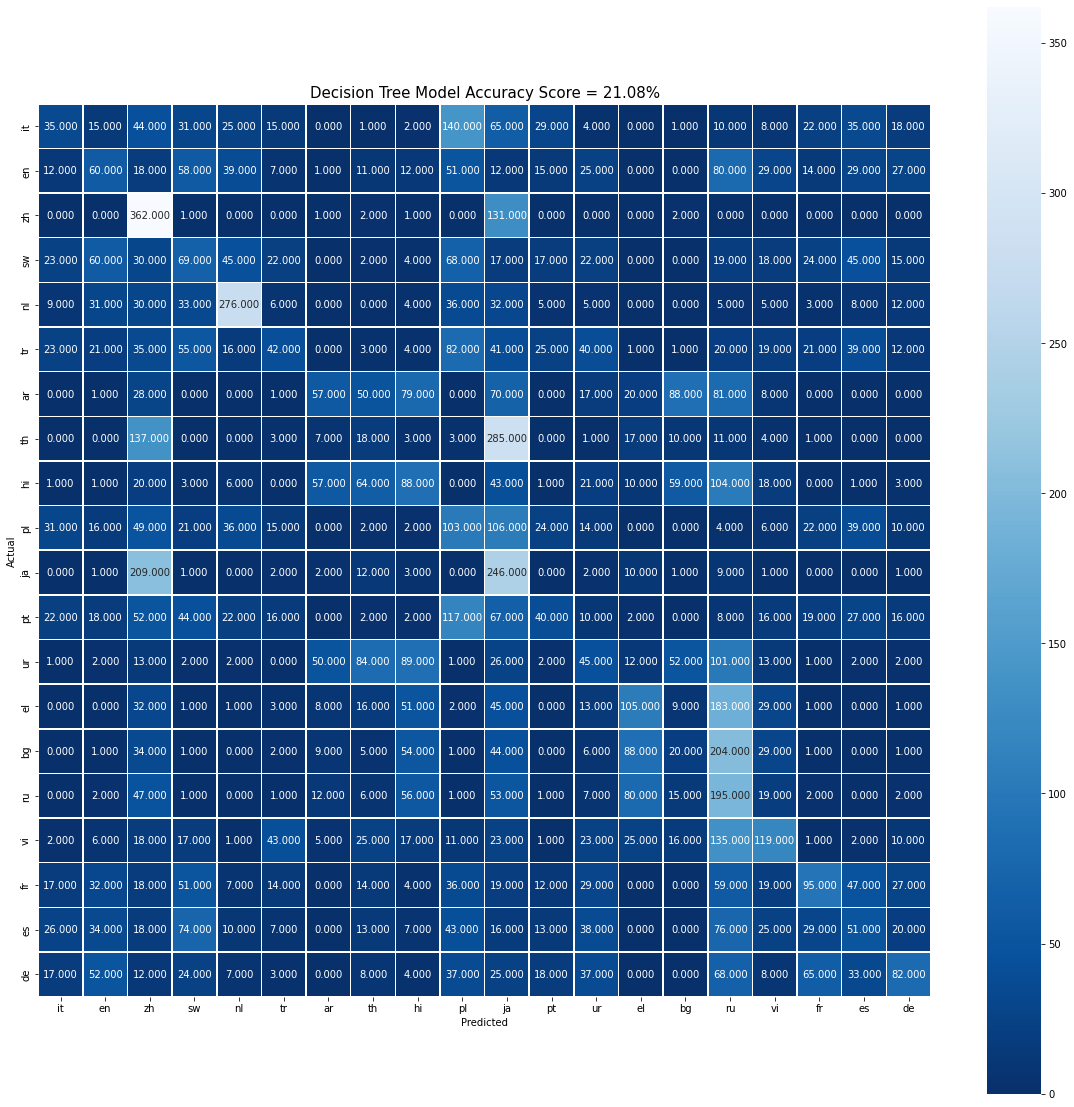

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_dt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Decision Tree Model Accuracy Score = '+ str(round(accuracy_score_dt*100,2)) +"%"
plt.title(title, size = 15)

**Note:** number of test samples per language are 500. \\
Looking at the confusion matrix we can see that the model had a poor performance on most of the languages. However, the languages that had the best classification ratios are: Chinese, Dutch, and Japanese.

**Random Forest Classifier**

A Random Forest consists of a large number of individual decision trees that operate together as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction.

In [ ]:
y = y.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
rf_clf = rf_clf.fit(X,y) # Fit/Train Random Forest Classifer on training set

# Save model to file in the current working directory so that it can be imported and used.
pkl_file = "random_forest_model.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(rf_clf, file)

# Load trained model from pickle file
with open(pkl_file, 'rb') as file:
    rf_clf = pickle.load(file)
rf_clf

y_pred = rf_clf.predict(X_test) 

In [ ]:
accuracy_score_rf = accuracy_score(y_test, y_pred)
accuracy_score_rf

0.2554

Text(0.5, 1.0, 'Random Forest Model Accuracy Score = 25.54%')

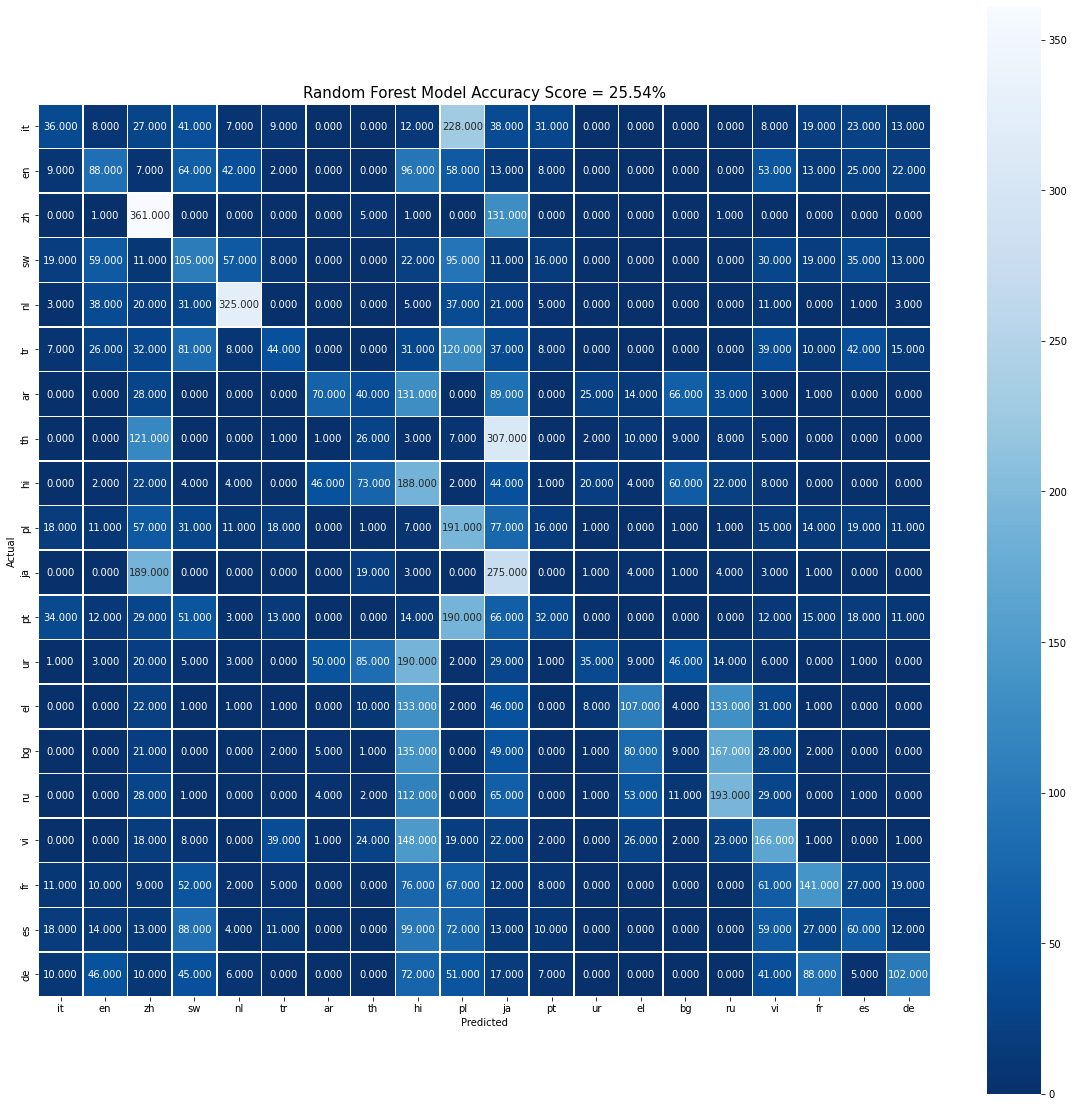

In [ ]:
cm_Model_rf = confusion_matrix(y_test, y_pred, labels=labels)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Random Forest Model Accuracy Score = '+ str(round(accuracy_score_rf*100,2)) +"%"
plt.title(title, size = 15)

The Random forest classifier is slightly better than the decision tree. The best classified languages are the same; Chinese, Dutch and Japanese.

**Gradient Boosting Classifier**

Boosting is a method of converting weak learners into strong learners.
In boosting, each new tree is a fit on a modified version of the original dataset. \\
Gradient Boosting trains many models in a gradual, additive and sequential manner. It identifies the model’s shortcomings by using gradients in the loss function.

In [ ]:
learning_rate = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for lr in learning_rate:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=lr)
    gb_clf.fit(X, y)

    print("Learning rate: ", lr)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X, y)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.534
Accuracy score (testing): 0.241
Learning rate:  0.075
Accuracy score (training): 0.560
Accuracy score (testing): 0.243
Learning rate:  0.1
Accuracy score (training): 0.577
Accuracy score (testing): 0.251
Learning rate:  0.25
Accuracy score (training): 0.617
Accuracy score (testing): 0.255
Learning rate:  0.5
Accuracy score (training): 0.634
Accuracy score (testing): 0.239
Learning rate:  0.75
Accuracy score (training): 0.563
Accuracy score (testing): 0.213
Learning rate:  1
Accuracy score (training): 0.056
Accuracy score (testing): 0.067


Based on the results, I use a learning_rate = 0.5 since it offers the highest accuracy score for the training set.

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5)
gb_clf.fit(X, y)

# Save model to file in the current working directory so that it can be imported and used.
pkl_file = "gradient_boost_model.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(gb_clf, file)

# Load trained model from pickle file
with open(pkl_file, 'rb') as file:
    gb_clf = pickle.load(file)

gb_clf # parameters of the Gradient Boost model are shown below

y_pred = gb_clf.predict(X_test)

In [ ]:
accuracy_score_gb = accuracy_score(y_test, y_pred)
print('Accuracy of the Gradient Boost model on the test set = ' + str(round(accuracy_score_gb*100,2)) +"%" )

Accuracy of the Gradient Boost model on the test set = 23.89%


Text(0.5, 1.0, 'Gradient Boost Model Accuracy Score = 23.89%')

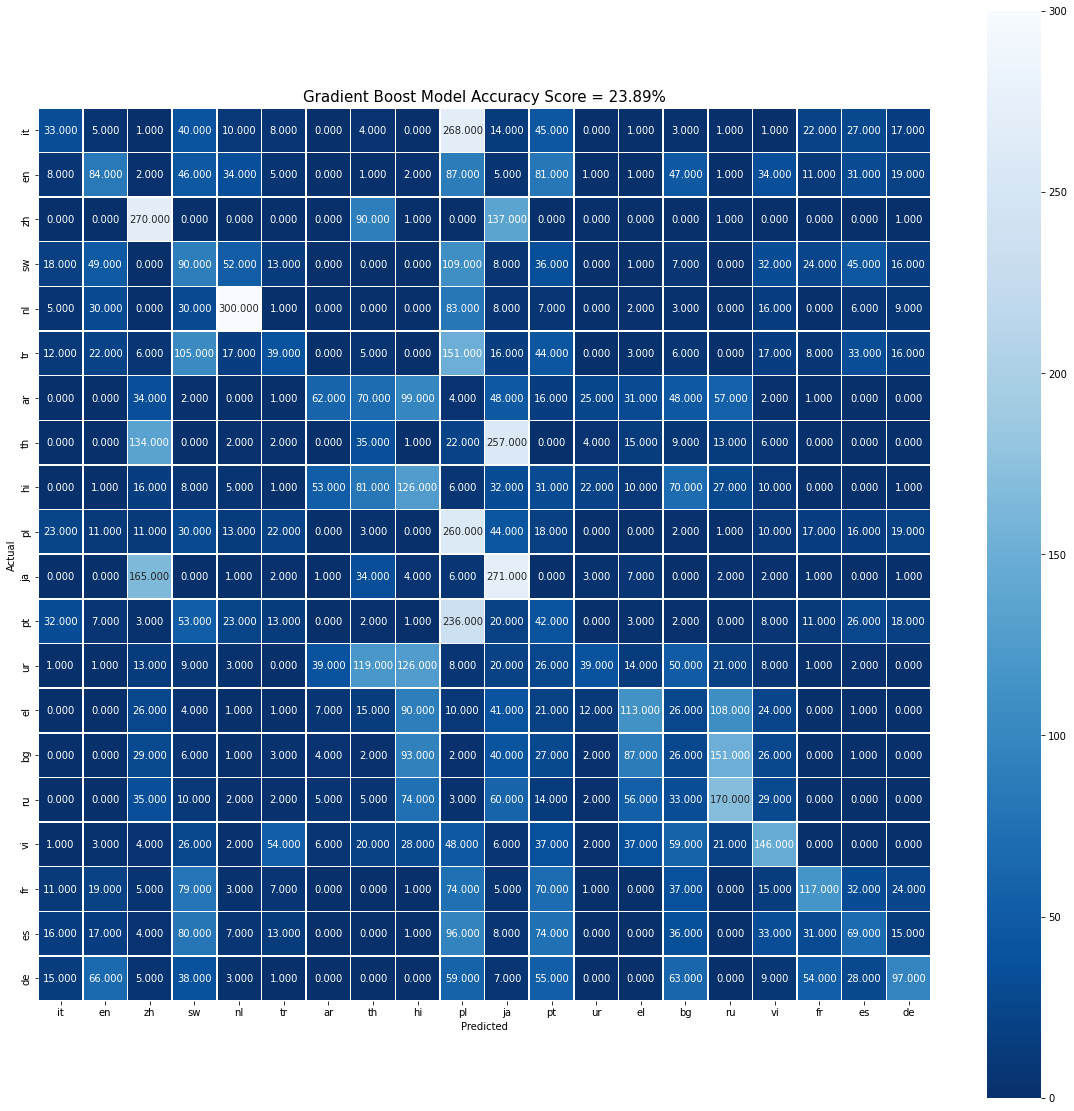

In [ ]:
cm_Model_gb = confusion_matrix(y_test, y_pred, labels=labels)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_gb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Gradient Boost Model Accuracy Score = '+ str(round(accuracy_score_gb*100,2)) +"%"
plt.title(title, size = 15)

**Conclusion:** \\
- In general the classification model based on the Random Forest offers the best predictive outcome with an accuracy score of 25.54%.
- Specifically, the model performs well for classifying Chinese, Dutch, and Japanese; as shown in the confusion matrix values.
- Overall, the performance of all the machine learning classifiers that I have experimented with is very poor compared to the state-of-the-art (as reported by huggingface) which is XLM-Roberta model that achieves 99.6%. 
- This poor performance can be due to the small number of features that has been manually extracted (16). Those features are not enough to capture the structure and complexity of the 20 languages in the dataset.
- In conclusion, the task is more complicated to be modelled using a simple ML classifier; thus I will experiment with a more complex model (Neural Netwerk) in the upcoming section.   

#2- Neural Network

I will train a simple 4-layer perceptron with a softmax layer at the end to do the classification. I am using Tensorflow and Keras frameworks.


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import time

from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras.optimizers
import tensorflow as tf
import torch

In [ ]:
# Hyperparams if GPU is available
if tf.config.list_physical_devices('GPU'):
    # GPU
    BATCH_SIZE = 512
    EPOCHS = 25 
    
# Hyperparams for CPU training
else:
    # CPU
    BATCH_SIZE = 64
    EPOCHS = 25

In [ ]:
df_train = train
data = list(df_train['text'])
# I am using a keras tokenizer that I fit on the training set
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(lower=True)
tokenizer.fit_on_texts(data)
encoded_input = tokenizer.texts_to_sequences(data)
encoded_input = pad_sequences(encoded_input, maxlen=1500, padding='post', truncating='post')
labels = df_train['labels']
df_train.head()

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


In [ ]:
label_dict = {v: i for i,v in enumerate(set(labels))}
df_train['labels'] = df_train['labels'].apply( lambda x : label_dict[x])

In [ ]:
print(len(encoded_input[0]))

1500


In [ ]:
x = encoded_input 
y = tf.constant(list(df_train['labels']))
y = tf.keras.utils.to_categorical(y, num_classes=len(label_dict))

In [ ]:
x[0]

array([  362, 49845,     2, ...,     0,     0,     0], dtype=int32)

In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
df_val = valid
data_val = list(df_val['text'])
encoded_val = tokenizer.texts_to_sequences(data_val)
encoded_val = pad_sequences(encoded_val, maxlen=1500, padding='post', truncating='post')
df_val['labels'] = df_val['labels'].apply( lambda x : label_dict[x])
x_val = encoded_val 
y_val = tf.constant(list(df_val['labels']))
y_val = tf.keras.utils.to_categorical(y_val, num_classes=len(label_dict))
df_val.head()

,labels,text
0,9,"""Ik ken geen druk,"" zei Mr. Feith, de ondersec..."
1,9,Hier is mijn advies op basis van mijn persoonl...
2,2,"Por el precio, este reloj es inmejorable. Esti..."
3,7,Il Giappone tace in occasione della tragedia d...
4,15,تشغيل صامت، تشغيل عميق، قم بتشغيل الإجابة


In [ ]:
input_size = len(encoded_input[0])

model = Sequential()
# Note: glorot_uniform is the Xavier uniform initializer.

model.add(Dense(500,input_dim=input_size, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1024, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1024, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1024, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1024, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(len(label_dict), kernel_initializer="glorot_uniform", activation="softmax"))
model_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=model_optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               750500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              513024    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1

In [ ]:
from keras.callbacks import TensorBoard

# Tensorboard
tensorboard = TensorBoard(log_dir="run")

history = model.fit(x,y,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_val, y_val),
                  callbacks=[tensorboard],
                  shuffle=True,
                  verbose=2)

Epoch 1/25
137/137 - 4s - loss: 2.8224 - accuracy: 0.1041 - val_loss: 3.3621 - val_accuracy: 0.0834 - 4s/epoch - 26ms/step
Epoch 2/25
137/137 - 1s - loss: 2.5995 - accuracy: 0.1558 - val_loss: 3.3364 - val_accuracy: 0.0965 - 979ms/epoch - 7ms/step
Epoch 3/25
137/137 - 1s - loss: 2.5585 - accuracy: 0.1694 - val_loss: 3.3080 - val_accuracy: 0.1027 - 962ms/epoch - 7ms/step
Epoch 4/25
137/137 - 1s - loss: 2.5390 - accuracy: 0.1766 - val_loss: 3.3327 - val_accuracy: 0.0929 - 1s/epoch - 8ms/step
Epoch 5/25
137/137 - 1s - loss: 2.5261 - accuracy: 0.1792 - val_loss: 3.3420 - val_accuracy: 0.1023 - 974ms/epoch - 7ms/step
Epoch 6/25
137/137 - 1s - loss: 2.5191 - accuracy: 0.1819 - val_loss: 3.3496 - val_accuracy: 0.1079 - 1s/epoch - 8ms/step
Epoch 7/25
137/137 - 1s - loss: 2.5104 - accuracy: 0.1868 - val_loss: 3.3398 - val_accuracy: 0.1015 - 1s/epoch - 8ms/step
Epoch 8/25
137/137 - 1s - loss: 2.5056 - accuracy: 0.1869 - val_loss: 3.3079 - val_accuracy: 0.1121 - 1s/epoch - 8ms/step
Epoch 9/25
137

In [ ]:
df_test = test
data_test = list(df_test['text'])
encoded_test = tokenizer.texts_to_sequences(data_test)
encoded_test = pad_sequences(encoded_test, maxlen=1500, padding='post', truncating='post')
df_test['labels'] = df_test['labels'].apply( lambda x : label_dict[x])
x_test = encoded_test
y_test = tf.constant(list(df_test['labels']))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(label_dict))
df_test.head()

,labels,text
0,9,Een man zingt en speelt gitaar.
1,9,De technologisch geplaatste Nasdaq Composite I...
2,2,Es muy resistente la parte trasera rígida y lo...
3,7,"""In tanti modi diversi, l'abilità artistica de..."
4,15,منحدر يواجه العديد من النقاشات المتجهه إزاء ال...


In [ ]:
# Evaluation on Test set
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 3.2515 - accuracy: 0.1152
accuracy: 11.52%


A simple multi-layer perceptron is not enough to learn the task, it achieves an accuracy of 11.52% which is worst than the ML classifiers. so I will move to a deep neural model and fine-tune it on the task.

#3- Finetuning a Pretrained Model

I will use XML-Roberta (XML-R for short); which is the state-of-the-art and largest multilingual language model so far. XLM-R has been trained on 100 languages so it is expected to contain highly efficient language identification features. The model is available at huggingface (https://huggingface.co/docs/transformers/model_doc/xlm-roberta) and I also use huggingface trainer API to finetune the model on a small portion of the training dataset, then test its performance on the test set. 

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 32.8 MB/s 
     |████████████████████████████████| 101 kB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 51.9 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 34.4 MB/s 
     |████████████████████████████████| 212 kB 70.5 MB/s 
     |████████████████████████████████| 140 kB 66.7 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
     |████████████████████████████████| 127 kB 61.7 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 144 kB 50.3 MB/s 
     |████████████████████████████████| 271 kB 61.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import TrainingArguments
import numpy as np
from datasets import load_metric, load_dataset
from transformers import Trainer

In [ ]:
dataset = load_dataset("papluca/language-identification")

Using custom data configuration papluca--language-identification-49176cc02800e1fc


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

labels = dataset['train']['labels']
label_dict = {v: i for i,v in enumerate(set(labels))}

def tokenize_function(examples):
  tokens = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
  tokens['labels'] = [label_dict[label] for label in examples["labels"]]
  return tokens

tokenized_datasets = dataset.map(tokenize_function, batched=True)
small_train_dataset = tokenized_datasets['train'].shuffle(seed=42).select(range(100))
small_eval_dataset = tokenized_datasets['validation'].shuffle(seed=42).select(range(100))

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

  0%|          | 0/70 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

In [ ]:
small_train_dataset.column_names

['labels', 'text', 'input_ids', 'attention_mask']

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", ignore_mismatched_sizes=True, num_labels=20)

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([4, 768]) in the checkpoint and torch.Size([20, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([4]) in the checkpoint and torch.Size([20]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
metric = load_metric("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(output_dir="test_trainer", 
                                  evaluation_strategy="epoch", 
                                  per_device_train_batch_size=1, 
                                  per_device_eval_batch_size=1,
                                  num_train_epochs=10.0)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 100
  Num Epochs = 10
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 1000


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.796250,0.560000
2,No log,1.135648,0.830000
3,No log,0.809695,0.860000
4,No log,0.486622,0.900000
5,1.089500,0.525721,0.870000
6,1.089500,0.383162,0.880000
7,1.089500,0.298596,0.910000
8,1.089500,0.248448,0.940000
9,1.089500,0.276441,0.940000
10,0.220500,0.256307,0.940000


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 100
  Batch size = 1
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 100
  Batch size = 1
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 100
  Batch size = 1
T

TrainOutput(global_step=1000, training_loss=0.6550038681030274, metrics={'train_runtime': 191.0665, 'train_samples_per_second': 5.234, 'train_steps_per_second': 5.234, 'total_flos': 263153577984000.0, 'train_loss': 0.6550038681030274, 'epoch': 10.0})

Due to GPU limits in google colab, I had to split the test-data into small batches and evaluate each batch seperately. I average the accuracy scores on each batch to obtain the final accuracy score of the model. 

In [ ]:
metrics = []

In [ ]:
small_test_dataset_part1 = tokenized_datasets['test'].shuffle(seed=42).select(range(1000))
predictions, lables, metrics1 = trainer.predict(small_test_dataset_part1)
metrics.append(metrics1['test_accuracy'])
print(metrics1)

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.42164576053619385, 'test_accuracy': 0.905, 'test_runtime': 35.1773, 'test_samples_per_second': 28.427, 'test_steps_per_second': 28.427}


In [ ]:
small_test_dataset_part2 = tokenized_datasets['test'].shuffle(seed=42).select(range(1000,2000))
predictions, lables, metrics2 = trainer.predict(small_test_dataset_part2)
metrics.append(metrics2['test_accuracy'])
print(metrics2)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.48723211884498596, 'test_accuracy': 0.891, 'test_runtime': 35.6282, 'test_samples_per_second': 28.068, 'test_steps_per_second': 28.068}


In [ ]:
small_test_dataset_part3 = tokenized_datasets['test'].shuffle(seed=42).select(range(2000,3000))
predictions, lables, metrics3 = trainer.predict(small_test_dataset_part3)
metrics.append(metrics3['test_accuracy'])
print(metrics3)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.4805714786052704, 'test_accuracy': 0.891, 'test_runtime': 37.4712, 'test_samples_per_second': 26.687, 'test_steps_per_second': 26.687}


In [ ]:
small_test_dataset_part4 = tokenized_datasets['test'].shuffle(seed=42).select(range(3000,4000))
predictions, lables, metrics4 = trainer.predict(small_test_dataset_part4)
metrics.append(metrics4['test_accuracy'])
print(metrics4)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.381295770406723, 'test_accuracy': 0.919, 'test_runtime': 35.8194, 'test_samples_per_second': 27.918, 'test_steps_per_second': 27.918}


In [ ]:
small_test_dataset_part5 = tokenized_datasets['test'].shuffle(seed=42).select(range(4000,5000))
predictions, lables, metrics5 = trainer.predict(small_test_dataset_part5)
metrics.append(metrics5['test_accuracy'])
print(metrics5)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.5101644992828369, 'test_accuracy': 0.89, 'test_runtime': 36.8276, 'test_samples_per_second': 27.154, 'test_steps_per_second': 27.154}


In [ ]:
small_test_dataset_part6 = tokenized_datasets['test'].shuffle(seed=42).select(range(5000,6000))
predictions, lables, metrics6 = trainer.predict(small_test_dataset_part6)
metrics.append(metrics6['test_accuracy'])
print(metrics6)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.4606055021286011, 'test_accuracy': 0.897, 'test_runtime': 36.1565, 'test_samples_per_second': 27.658, 'test_steps_per_second': 27.658}


In [ ]:
small_test_dataset_part7 = tokenized_datasets['test'].shuffle(seed=42).select(range(6000,7000))
predictions, lables, metrics7 = trainer.predict(small_test_dataset_part7)
metrics.append(metrics7['test_accuracy'])
print(metrics7)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.3651230037212372, 'test_accuracy': 0.921, 'test_runtime': 36.0937, 'test_samples_per_second': 27.706, 'test_steps_per_second': 27.706}


In [ ]:
small_test_dataset_part8 = tokenized_datasets['test'].shuffle(seed=42).select(range(7000,8000))
predictions, lables, metrics8 = trainer.predict(small_test_dataset_part8)
metrics.append(metrics8['test_accuracy'])
print(metrics8)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.3781329393386841, 'test_accuracy': 0.907, 'test_runtime': 35.7791, 'test_samples_per_second': 27.949, 'test_steps_per_second': 27.949}


In [ ]:
small_test_dataset_part9 = tokenized_datasets['test'].shuffle(seed=42).select(range(8000,9000))
predictions, lables, metrics9 = trainer.predict(small_test_dataset_part9)
metrics.append(metrics9['test_accuracy'])
print(metrics9)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.3911846876144409, 'test_accuracy': 0.915, 'test_runtime': 36.2089, 'test_samples_per_second': 27.617, 'test_steps_per_second': 27.617}


In [ ]:
small_test_dataset_part10 = tokenized_datasets['test'].shuffle(seed=42).select(range(9000,10000))
predictions, lables, metrics10 = trainer.predict(small_test_dataset_part10)
metrics.append(metrics10['test_accuracy'])
print(metrics10)

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-49176cc02800e1fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-203798326dbe362c.arrow
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 1


{'test_loss': 0.42525121569633484, 'test_accuracy': 0.906, 'test_runtime': 35.9354, 'test_samples_per_second': 27.828, 'test_steps_per_second': 27.828}


In [ ]:
metrics

[0.905, 0.891, 0.891, 0.919, 0.89, 0.897, 0.921, 0.907, 0.915, 0.906]

In [ ]:
average_accuracy = sum(metrics)/ len(metrics)
print('average_test_accuracy = ', average_accuracy)

average_test_accuracy =  0.9042000000000001


when XLM-R (base) is finetuned only on 100 training samples for 10 epochs, it was able to achieve an accuracy of 90.42% which is a huge improvement compared to the previous method.

#4- Knowledge distillation

The XML-R model that has been finetuned on the task is very powerful yet not efficient at inference time (as seen from the implementation, I needed to split the test data due to GPU limits). It is also inconvenient for deployment on production level (on a mobile device for example). \\
My idea is to distill the knowledge contained in this model to a much simpler model (a multi-layer perceptron for example). This can be done by optimizing the student model (the simple model) to match the outputs of the teacher model (the finetuned XLM-R) using a transfer set of the task that we want to solve (language identification). \\
Initial studies suggested that the training set of the task is not enough for knowledge distillation and that data augmentation is needed to increase the size of the transfer set [1]. however, later studies showed that the training set is enough, and even using an arbitrary transfer set or random noise data is sufficient for knowledge distillation [2]. \\
My knowledge distillation implementation will depend on the training set of the dataset that I have used previously, without augmentation. \\


[1] https://arxiv.org/pdf/1903.12136.pdf \\
[2] https://arxiv.org/pdf/2011.09113.pdf

https://github.com/castorini/d-bert \\
This repository includes an implementation of Knowledge distillation from Bert, the code can be modified to use XLM-R. \\
to be continued ...

#References

I took inspiration from the following sources: \\
- https://medium.com/swlh/language-classification-using-machine-learning-in-python-fa0768daea67 
- https://github.com/floydhub/language-identification-template/blob/master/language-identification.ipynb
- https://huggingface.co/docs/transformers/training